### Import libraries and read data

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
input_data_ordered_raw = pd.read_csv('psi_9nt.csv')
#sequences = input_data_ordered_raw['seq'].tolist()

In [2]:
input_data_ordered_raw.head()

,seq,brca2_9nt,brca2_9nt_stderr,ikbkap_9nt,ikbkap_9nt_stderr,smn1_9nt,smn1_9nt_stderr
0,AAAGCAAAA,0.373522,0.095217,0.080039,0.081333,0.227001,0.082164
1,AAAGCAAAC,0.688386,0.063575,0.061021,0.018316,0.522138,0.017503
2,AAAGCAAAG,0.756357,0.481555,0.045032,0.023374,0.210907,0.170688
3,AAAGCAAAU,0.443014,0.127961,0.071423,0.028762,0.232645,0.044371
4,AAAGCAACA,0.548363,0.140963,0.100128,0.071551,0.362139,0.127696


In [3]:
len(input_data_ordered_raw)

32768

## Remove nan rows from dataframe

In [4]:
input_data_ordered_raw = input_data_ordered_raw.dropna()

In [5]:
sequences = input_data_ordered_raw['seq']
val = input_data_ordered_raw['brca2_9nt']
#val = input_data_ordered_raw['smn1_9nt']

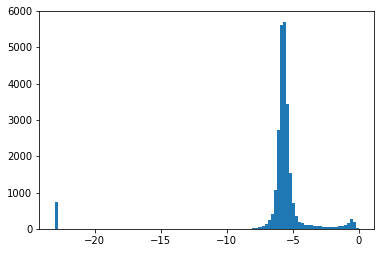

In [6]:
val_norm = (val-min(val))/(max(val)-min(val))
plt.hist(np.log(val_norm+1e-10),bins=100)
#plt.hist(val,bins=40)
plt.show()

In [7]:
len(sequences)

24831

In [8]:
#np.random.seed(0)

In [10]:
T = 300
t_max = 15
t_bg = 0.01

size_of_data = 10000
#size_of_data = len(sequences)

input_data_ordered_raw_copy = input_data_ordered_raw[0:size_of_data].copy()

#temp = np.exp(-(np.array(input_data_ordered_raw['val'][0:size_of_data]))/T)/(1+np.exp(-(np.array(input_data_ordered_raw['val'][0:size_of_data]))/T))
#plt.hist(t_max*temp+t_bg,bins=100)
#plt.show()
#np.array(input_data_ordered_raw['val'][0:100000])


### Add transcription column to dataframe

In [11]:
#input_data_ordered_raw_copy['t'] = t_max*temp+t_bg

In [12]:
input_data_ordered_raw_copy.head()

,seq,brca2_9nt,brca2_9nt_stderr,ikbkap_9nt,ikbkap_9nt_stderr,smn1_9nt,smn1_9nt_stderr
0,AAAGCAAAA,0.373522,0.095217,0.080039,0.081333,0.227001,0.082164
1,AAAGCAAAC,0.688386,0.063575,0.061021,0.018316,0.522138,0.017503
2,AAAGCAAAG,0.756357,0.481555,0.045032,0.023374,0.210907,0.170688
3,AAAGCAAAU,0.443014,0.127961,0.071423,0.028762,0.232645,0.044371
4,AAAGCAACA,0.548363,0.140963,0.100128,0.071551,0.362139,0.127696


In [13]:
input_data_ordered_raw_copy.head(10)

,seq,brca2_9nt,brca2_9nt_stderr,ikbkap_9nt,ikbkap_9nt_stderr,smn1_9nt,smn1_9nt_stderr
0,AAAGCAAAA,0.373522,0.095217,0.080039,0.081333,0.227001,0.082164
1,AAAGCAAAC,0.688386,0.063575,0.061021,0.018316,0.522138,0.017503
2,AAAGCAAAG,0.756357,0.481555,0.045032,0.023374,0.210907,0.170688
3,AAAGCAAAU,0.443014,0.127961,0.071423,0.028762,0.232645,0.044371
4,AAAGCAACA,0.548363,0.140963,0.100128,0.071551,0.362139,0.127696
5,AAAGCAACC,0.591136,0.114070,0.027130,0.033875,0.238895,0.038632
6,AAAGCAACG,17.174981,18.820321,0.113262,0.051988,5.151112,3.780424
7,AAAGCAACU,0.692794,0.236551,0.028119,0.140126,0.551798,0.044548
8,AAAGCAAGA,0.495872,0.087332,0.044701,0.047041,3.465294,0.934357
9,AAAGCAAGC,0.344958,0.047195,0.000000,0.088926,0.872352,0.457953


## Split the data into test and train

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(sequences,val_norm,test_size=0.2)
#x_train, x_test, y_train, y_test = train_test_split(sequences,val,test_size=0.2)



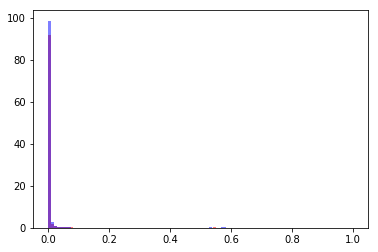

In [16]:
plt.hist(y_train,bins=100,color='r',density=True,alpha=0.5)
plt.hist(y_test,bins=100,color='b',density=True,alpha=0.5)
plt.show()

## One-hot encode the data ... this takes a few minutes

In [17]:
temp_x_train = []
temp_x_test = []

for reshape_index in range(len(x_train)):
    temp_x_train.append(list(np.array(x_train)[reshape_index]))

for reshape_test_index in range(len(x_test)):
    temp_x_test.append(list(np.array(x_test)[reshape_test_index]))
    
x_train = temp_x_train
x_test = temp_x_test

x_train = np.array(x_train)
x_test = np.array(x_test)

In [18]:
x_train[0]

array(['U', 'G', 'U', 'G', 'C', 'U', 'U', 'C', 'A'], dtype='<U1')

In [19]:
#base_dict = {"K":0, "R":1, "H":2, "E":3, "D":4, "N":5, "Q":6, "T":7, "S":8, "C":9, "G":10, "A":11, "V":12, "L":13, "I":14, "M":15, "P":16, "Y":17, "F":18, "W":19}
base_dict = {'A': 0, 'C': 1, 'G': 2, 'U': 3}

In [20]:
test_size = len(y_test)

In [84]:
test_size

4967

In [22]:
x_train_tensor = np.zeros(list(x_train.shape) + [4])    # shape: (batch_size, 4)
x_test_tensor = np.zeros(list(x_test.shape) + [4])    # shape: (batch_size, 4)
#base_dict = {"K":0, "R":1, "H":2, "E":3, "D":4, "N":5, "Q":6, "T":7, "S":8, "C":9, "G":10, "A":11, "V":12, "L":13, "I":14, "M":15, "P":16, "Y":17, "F":18, "W":19}
base_dict = {'A': 0, 'C': 1, 'G': 2, 'U': 3}

#base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
num_sample = len(x_train_tensor)
seq_length = len(x_train[0])
test_size = len(x_test)


#naive one-hot encoding
for row in range(num_sample):
    for col in range(seq_length):
        x_train_tensor[row,col,base_dict[x_train[row,col]]] = 1
        if(row<test_size):
            x_test_tensor[row,col,base_dict[x_test[row,col]]] = 1


['U', 'G', 'U', 'G', 'C', 'U', 'U', 'C', 'A']


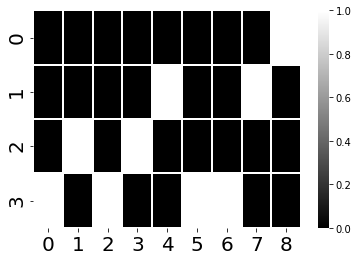

In [119]:
import seaborn as sns
print(temp_x_train[0])
sns.heatmap(x_train_tensor[0].T,cmap='gray',linewidths=1)
plt.tick_params(labelsize=20)
plt.savefig('binary_martix.pdf')
plt.show()

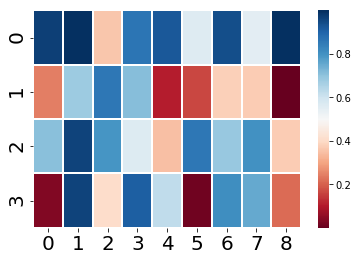

In [118]:
np.shape(x_train_tensor[0])

#print()
sns.heatmap(np.random.rand(9,4).T,cmap='RdBu',linewidths=1)
plt.tick_params(labelsize=20)
plt.savefig('model_martix.pdf')
plt.show()

In [23]:
print('Training set shape: {}'.format(x_train_tensor.shape))
print('Training set label shape: {}'.format(y_train.shape))

print('Test set shape: {}'.format(x_test_tensor.shape))
print('Test set label shape: {}'.format(y_test.shape))

Training set shape: (19864, 9, 4)
Training set label shape: (19864,)
Test set shape: (4967, 9, 4)
Test set label shape: (4967,)


In [24]:
#REGG
x_train_tensor[0][3]


array([0., 0., 1., 0.])

In [25]:
y_train.shape

(19864,)

In [26]:
y_train = np.array(y_train).reshape(y_train.shape[0],1)

## Custom error metric

In [47]:
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

## Custom Loss

In [63]:
import keras.backend as K
import tensorflow as tf

K.clear_session()

In [64]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout 
from keras import regularizers
from keras.optimizers import SGD, Adam, RMSprop
from keras.constraints import maxnorm, nonneg

model = Sequential() 
model.add(Flatten())
model.add(Dense(1, activation='linear'))
model.add(Dense(5, activation='sigmoid',W_constraint=nonneg()))
#model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear',W_constraint=nonneg()))

sgd = SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="sigmoid", kernel_constraint=<keras.con...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_constraint=<keras.con...)`
  if sys.path[0] == '':


In [65]:
#model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['mean_absolute_error'])
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0001), metrics=['mean_absolute_error'])

In [66]:
#history = model.fit(x_train_flat, y_train, validation_split=0.2, epochs=25)  # starts training
history = model.fit(x_train_tensor, y_train, validation_split=0.2, epochs=60)  # starts training

Train on 15891 samples, validate on 3973 samples
Epoch 1/60
15891/15891 [==============================] - 1s 46us/step - loss: 0.0129 - mean_absolute_error: 0.0736 - val_loss: 0.0109 - val_mean_absolute_error: 0.0577
Epoch 2/60
15891/15891 [==============================] - 0s 28us/step - loss: 0.0092 - mean_absolute_error: 0.0456 - val_loss: 0.0105 - val_mean_absolute_error: 0.0415
Epoch 3/60
15891/15891 [==============================] - 0s 30us/step - loss: 0.0090 - mean_absolute_error: 0.0367 - val_loss: 0.0105 - val_mean_absolute_error: 0.0388
Epoch 4/60
15891/15891 [==============================] - 0s 28us/step - loss: 0.0090 - mean_absolute_error: 0.0353 - val_loss: 0.0105 - val_mean_absolute_error: 0.0362
Epoch 5/60
15891/15891 [==============================] - 0s 28us/step - loss: 0.0090 - mean_absolute_error: 0.0347 - val_loss: 0.0105 - val_mean_absolute_error: 0.0381
Epoch 6/60
15891/15891 [==============================] - 0s 27us/step - loss: 0.0090 - mean_absolute_erro

Epoch 49/60
15891/15891 [==============================] - 0s 26us/step - loss: 0.0034 - mean_absolute_error: 0.0255 - val_loss: 0.0040 - val_mean_absolute_error: 0.0264
Epoch 50/60
15891/15891 [==============================] - 0s 26us/step - loss: 0.0033 - mean_absolute_error: 0.0246 - val_loss: 0.0039 - val_mean_absolute_error: 0.0259
Epoch 51/60
15891/15891 [==============================] - 0s 26us/step - loss: 0.0032 - mean_absolute_error: 0.0239 - val_loss: 0.0038 - val_mean_absolute_error: 0.0250
Epoch 52/60
15891/15891 [==============================] - 1s 36us/step - loss: 0.0031 - mean_absolute_error: 0.0231 - val_loss: 0.0037 - val_mean_absolute_error: 0.0245
Epoch 53/60
15891/15891 [==============================] - 0s 28us/step - loss: 0.0030 - mean_absolute_error: 0.0224 - val_loss: 0.0036 - val_mean_absolute_error: 0.0239
Epoch 54/60
15891/15891 [==============================] - 1s 37us/step - loss: 0.0029 - mean_absolute_error: 0.0217 - val_loss: 0.0035 - val_mean_abs

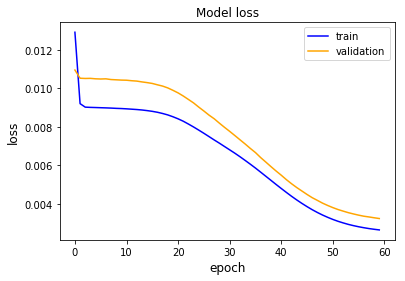

In [67]:
plt.figure()
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.title('Model loss',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

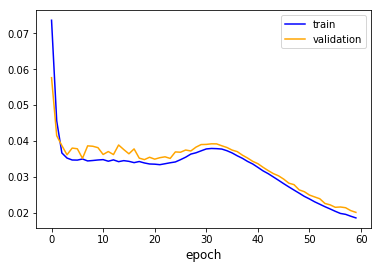

In [68]:
plt.figure()
plt.plot(history.history['mean_absolute_error'],color='blue')
plt.plot(history.history['val_mean_absolute_error'],color='orange')
#plt.title('Model loss',fontsize=12)
#plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()

In [69]:
'''
plt.figure()
plt.plot(history.history['r_square'],color='blue')
plt.plot(history.history['val_r_square'],color='orange')
#plt.title('Model loss',fontsize=12)
#plt.ylabel('loss',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['train', 'validation'])
#plt.savefig('Write_up/model_loss.png')
plt.show()
'''

"\nplt.figure()\nplt.plot(history.history['r_square'],color='blue')\nplt.plot(history.history['val_r_square'],color='orange')\n#plt.title('Model loss',fontsize=12)\n#plt.ylabel('loss',fontsize=12)\nplt.xlabel('epoch',fontsize=12)\nplt.legend(['train', 'validation'])\n#plt.savefig('Write_up/model_loss.png')\nplt.show()\n"

In [70]:
#model_prediction = model.predict(x_test_flat)
model_prediction = model.predict(x_test_tensor)
model_prediction_train = model.predict(x_train_tensor)

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 37        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.layers
get_1st_layer_output = K.function([model.layers[0].input],[model.layers[1].output])
layer_output = get_1st_layer_output([x_test_tensor])
get_1st_layer_output_train = K.function([model.layers[0].input],[model.layers[1].output])
layer_output_train = get_1st_layer_output_train([x_train_tensor])

In [73]:
layer_output_train = np.array(layer_output_train)
layer_output_train = layer_output_train.reshape(np.shape(layer_output_train)[1],1)
np.shape(layer_output_train)

(19864, 1)

In [74]:
layer_output = np.array(layer_output)
layer_output = layer_output.reshape(np.shape(layer_output)[1],1)
np.shape(layer_output)

(4967, 1)

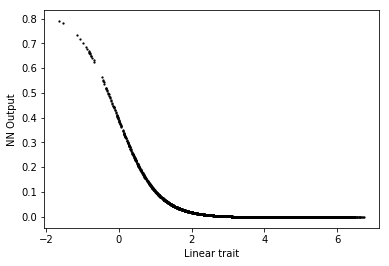

In [82]:
plt.scatter(-layer_output,model_prediction,alpha=1.0,s=1.5,color='black')
plt.xlabel('Linear trait')
plt.ylabel('NN Output')
#plt.plot([0,1],color='black',linewidth=3,alpha=0.75)
plt.show()

In [76]:
y_test = np.array(y_test).reshape(-1,1)

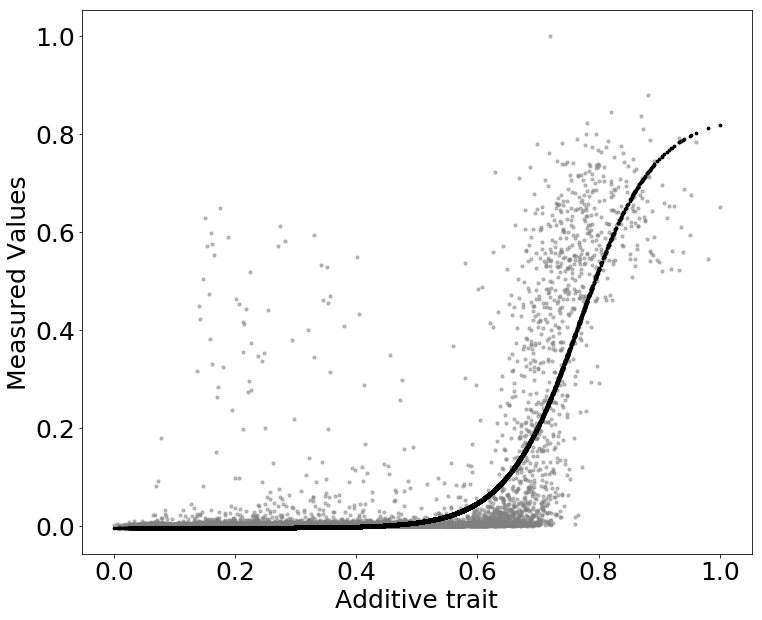

In [83]:
plt.figure
figure_size = [12,10]
plt.figure(figsize=figure_size)
#plt.title('RNA Splicing data: RNA sequences vs. PSI: Brca ', fontsize=12)
#plt.scatter(layer_output,y_test,alpha=0.5,s=3,color='gray', label='True values vs. additive trait')
#plt.scatter(layer_output,model_prediction,alpha=1,s=7.5,color='black', label='NN output vs. additive trait')

layer_output_train_scaled = (layer_output_train-min(layer_output_train))/(max(layer_output_train)-min(layer_output_train))

plt.scatter(layer_output_train_scaled,y_train,alpha=0.5,s=10,color='gray', label='True values vs. additive trait')
plt.scatter(layer_output_train_scaled,model_prediction_train,alpha=1,s=7.5,color='black', label='NN output vs. additive trait')


plt.xlabel('Additive trait',fontsize=25)
plt.ylabel('Measured Values',fontsize=25)
#plt.ylabel('Neural Network Prediction',fontsize=12)
plt.tick_params(labelsize=25)
#plt.legend(fontsize=12)
plt.savefig('RNA_splice_GE_NN_monotic_BRCA_scaled_for_talk.png')
plt.show()

In [78]:
#np.savetxt('hidden_layer_out.txt',layer_output)
#np.savetxt('test_labels.txt',y_test)
#np.savetxt('NN_out.txt',model_prediction)

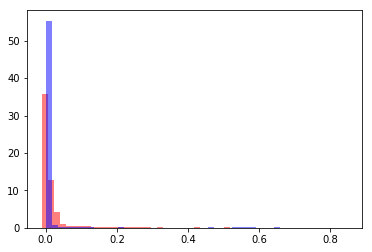

In [71]:
plt.hist(model_prediction,color='r',alpha=0.5,density=True,bins=50)
plt.hist(y_test,color='b',alpha=0.5,density=True,bins=50)
#plt.hist(model_prediction,bins=100,color='b',alpha=0.5)
plt.show()

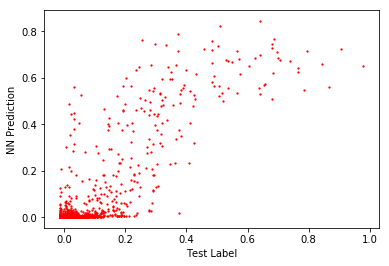

In [140]:
#plt.scatter(y_test,model_prediction,alpha=0.5)
plt.scatter(model_prediction,y_test,alpha=1.0,s=1.5,color='red')
plt.xlabel('Test Label')
plt.ylabel('NN Prediction')
#plt.plot([0,1],color='black',linewidth=3,alpha=0.75)
#plt.xlim([0.3,0.8])
plt.show()

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 37        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [143]:
from keras.models import load_model

#model.save('ann_rna_splicing_brca.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('ann_delta_g_regression_40k_trian.h5')
#model = load_model('train_90k_test_5k_10_filters_1Convlayer.h5')

In [95]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression/global_epistasis_RNA_splicing'